# Multi-Layer Perceptron (MLP)

This file contains the implementation of simple MLP containing dense layers. Objective of this file is to compare the performance of models of these networks based on different features like:

1. Hyperparameters (Number of layers, Number of neurons per layer)

2. Activation functions

3. Optimization algorithm

4. Number of training dataset

5. Complexity of training dataset

6. Loss Functions

## Dataset:

The following datasets are used for comparison:

1. MNIST Handwritten digit dataset

2. CIFAR 100 dataset

3. (Text dataset)

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Model

In [3]:
def get_model(no_layers, neurons_per_layer, activation_function, output_function, optimisation_algorithm, loss_fn, total_inputs, total_classes, metrics=[]):
    """
    Returns a model with the specified hyper-parameters
    no_layers: Number of hidden layers in the network
    neurons_per_layer: Number of neurons per hidden layer
    activation_function: Activation function of the layers (except output layer)
    output_function: Acitvation function of the output layer
    optimization_algorithm: Optimization algorithm for the network
    loss_fn: Loss function for the network
    total_inputs: Number of neurons in the input layer
    total_classes: Number of neurons in the output layer
    """
    input_layer = tf.keras.layers.Input(shape=(total_inputs,))
    layer = None
    for i in range(no_layers):
        if i == 0:
            layer = tf.keras.layers.Dense(neurons_per_layer, activation=activation_function)(input_layer)
        else:
            layer = tf.keras.layers.Dense(neurons_per_layer, activation=activation_function)(layer)
    output_layer = tf.keras.layers.Dense(total_classes, activation=output_function)(layer)
    model = tf.keras.models.Model(input_layer, output_layer)
    model.compile(
        optimizer=optimisation_algorithm,
        loss=loss_fn,
        metrics=metrics
    )
    return model

In [4]:
hidden_layers = [i for i in range(1, 15, 1)]
neurons_per_layer = [i for i in range(100, 1000, 10)]
activation_functions = {
    'RELU': 'relu', 
    'Sigmoid': 'sigmoid', 
    'Softmax': 'softmax', 
    'Tanh': 'tanh'
}
optimization_algs = {
    'Adam': tf.keras.optimizers.Adam(0.001),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.001),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=0.001),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.001)
}


## 2. Dataset Preprocessing

### MNIST

In [5]:
def get_mnist_dataset():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    if np.max(x_train) > 1:
        x_train, x_test = x_train/(np.max(x_train) * 1.0), x_test/(np.max(x_test)*1.0)
    return x_train, y_train, x_test, y_test

Total Train dataset: (60000, 28, 28), Train labels: (60000,), Test dataset: (10000, 28, 28), Test labels: (10000,)


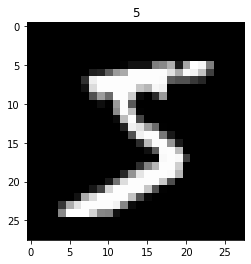

In [6]:
x_train, y_train, x_test, y_test = get_mnist_dataset()
print(f'Total Train dataset: {x_train.shape}, Train labels: {y_train.shape}, Test dataset: {x_test.shape}, Test labels: {y_test.shape}')
plt.figure(1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0], 'gray')
plt.show()

### CIFAR 100

In [7]:
def get_cifar100_dataset():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()
    if np.max(x_train) > 1:
        x_train, x_test = x_train/(np.max(x_train) * 1.0), x_test/(np.max(x_test)*1.0)
    return x_train, y_train, x_test, y_test

Total Train dataset: (50000, 32, 32, 3), Train labels: (50000, 1), Test dataset: (10000, 32, 32, 3), Test labels: (10000, 1)


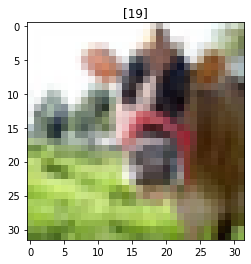

In [8]:
x_train, y_train, x_test, y_test = get_cifar100_dataset()
print(f'Total Train dataset: {x_train.shape}, Train labels: {y_train.shape}, Test dataset: {x_test.shape}, Test labels: {y_test.shape}')
plt.figure(1)
plt.title(str(y_train[0]))
plt.imshow(x_train[0], 'gray')
plt.show()

## 3. Train Model

In [9]:
def train_model(model, x_train, x_test, y_train, y_test, verbose=False, desc='', show_every=10, epochs=50, batch_size=32):
    accuracies = []
    train_accuracies = []
    losses = []
    for i in tqdm(range(epochs), desc=desc):
        history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0)
        y_preds = np.argmax(model.predict(x_test), axis=-1)

        loss = np.mean(history.history['loss'])
        train_acc = np.mean(history.history['sparse_categorical_accuracy'])
        accuracy = accuracy_score(y_test, y_preds)

        accuracies.append(accuracy)
        losses.append(loss)
        train_accuracies.append(train_acc)
        if verbose and (i % show_every == 0):
            print(f'Epoch {i+1}, Loss: {loss}, Acc: {accuracy}, Train Accuracy: {train_acc}')
    return accuracies, losses, train_accuracies

## 4. Comparison of Different Input Layers

1. Neurons per layer: 100

2. Activation Fuction: Relu

3. Output activation: Softmax

4. Optimization: Adam

5. Loss: Binary CrossEntropy

6. Batch Size: 32

7. Epochs: 50

#### MNIST

In [10]:
x_train, y_train, x_test, y_test = get_mnist_dataset()
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))

x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = shuffle(x_test, y_test)

Layers: 14: 100%|██████████████████████████████████████████████████████████████████████| 50/50 [20:33<00:00, 24.68s/it]


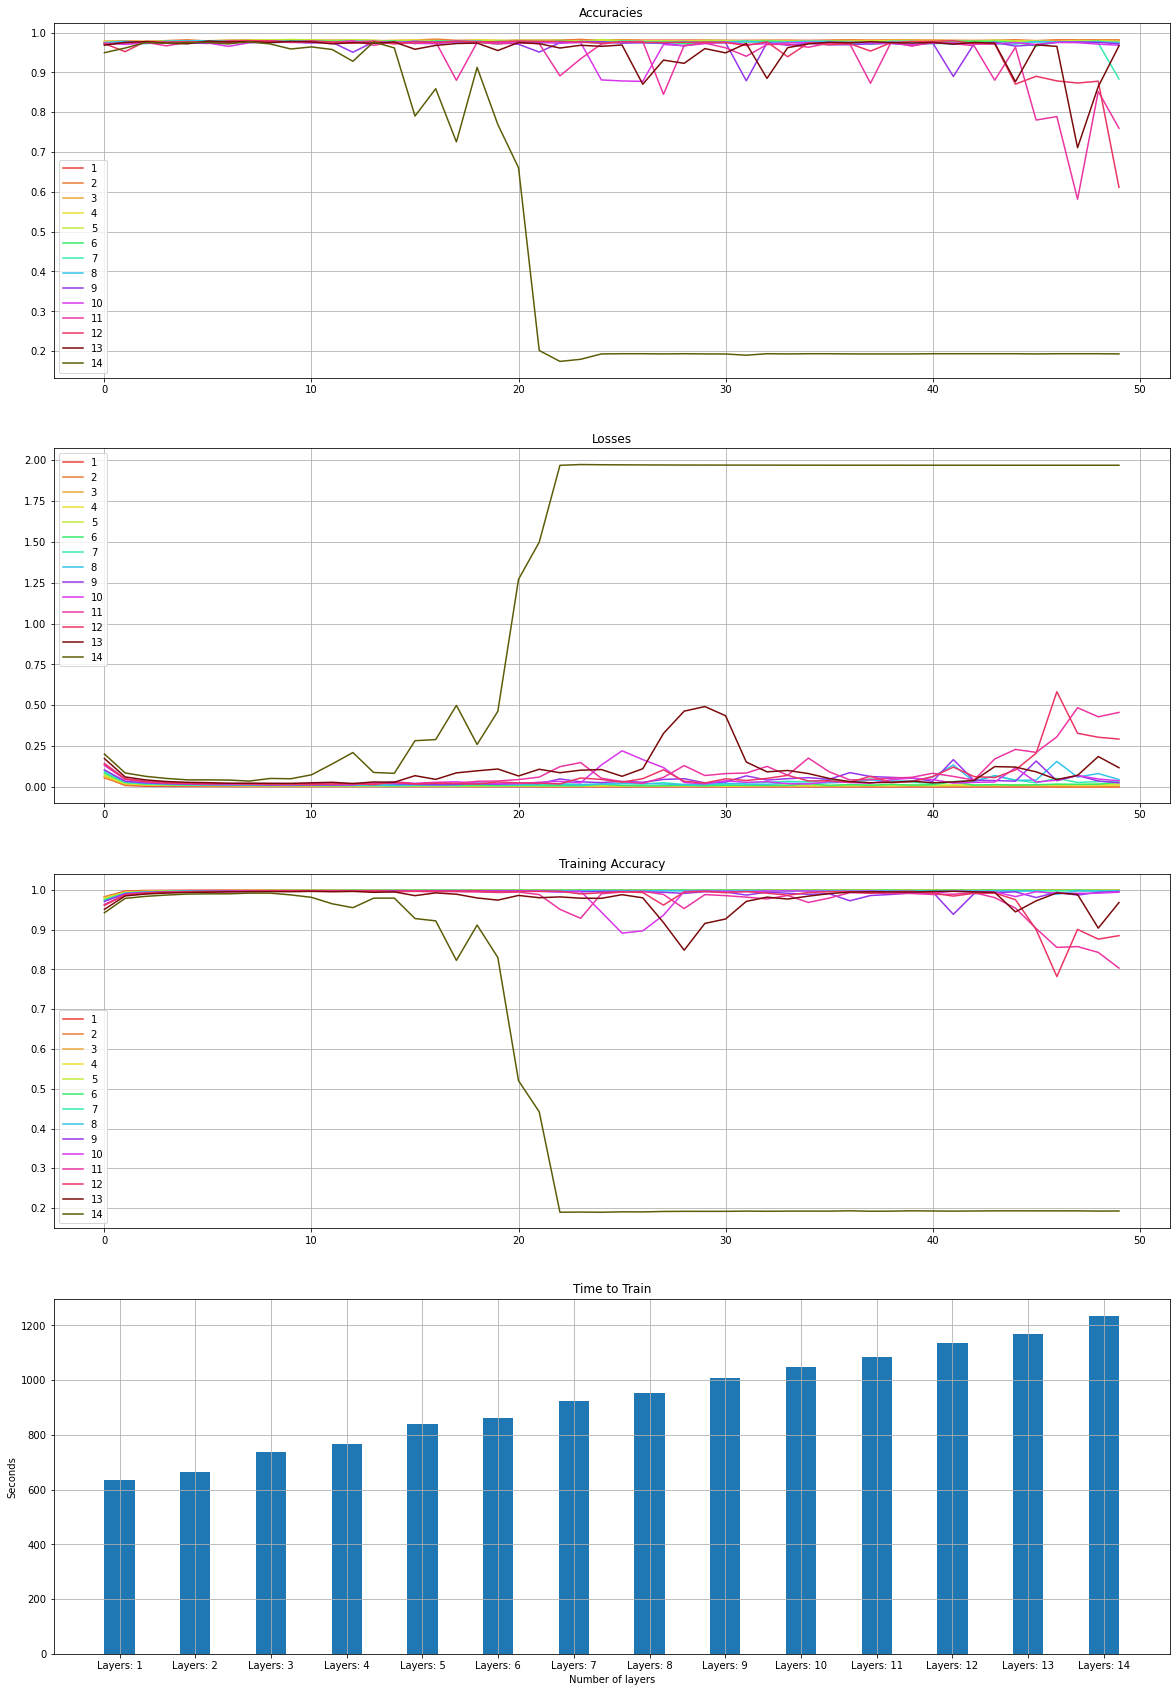

In [13]:
colors = [
    '#eb4034',
    '#eb7a34',
    '#eba534',
    '#ebdf34',
    '#c0eb34',
    '#34eb6b',
    '#34ebb1',
    '#34c3eb',
    '#9634eb',
    '#d934eb',
    '#eb34a2',
    '#eb3462',
    '#7a0909',
    '#5c5c06',
    '#06425c',
    '#000000'
]
plt.figure(1, figsize=(20, 30))
time_to_train = []
time_to_train_x = []
for i in hidden_layers:
    time_to_train_x.append(f'Layers: {i}')

for i in hidden_layers:
    model = get_model(
        no_layers=i,
        neurons_per_layer=100,
        activation_function=activation_functions['RELU'],
        output_function='softmax',
        optimisation_algorithm=optimization_algs['Adam'],
        loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(),
        total_inputs=x_train.shape[1],
        total_classes=np.unique(y_train).size,
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy()
        ]
    )
    start = time.time()
    a, l, ta = train_model(model, x_train, x_test, y_train, y_test, desc=f'Layers: {i}', show_every=2, batch_size=32, epochs=50)
    end = time.time()
    time_to_train.append(end-start)
    plt.subplot(4, 1, 1)
    plt.plot(a, color=colors[i-1], label=str(i))

    plt.subplot(4, 1, 2)
    plt.plot(l,color=colors[i-1], label=str(i))


    plt.subplot(4, 1, 3)
    plt.plot(ta,color=colors[i-1], label=str(i))

plt.subplot(4, 1, 1)
plt.title('Accuracies')
plt.legend()
plt.grid()

plt.subplot(4, 1, 2)
plt.title('Losses')
plt.legend()
plt.grid()

plt.subplot(4, 1, 3)
plt.title('Training Accuracy')
plt.legend()
plt.grid()

plt.subplot(4, 1, 4)
plt.title('Time to Train')
plt.bar(time_to_train_x, time_to_train, width=0.4)
plt.xlabel('Number of layers')
plt.ylabel('Seconds')
plt.grid()

plt.show()